In [35]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

In [36]:
data_train_path='train'
data_test_path='test'
data_val_path='validation'

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [38]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [39]:
train_data = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(150, 150),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical'
)

Found 225 images belonging to 3 classes.


In [40]:
test_data = train_datagen.flow_from_directory(
    data_test_path,
    target_size=(150, 150),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical'
)

Found 150 images belonging to 3 classes.


In [41]:
val_data = train_datagen.flow_from_directory(
    data_val_path,
    target_size=(150, 150),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical'
)

Found 75 images belonging to 3 classes.


In [42]:
def display_images(data):
    images, labels = next(data)  # Get one batch
    for i in range(5):  # Display 5 images
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i].argmax()}")
        plt.axis('off')
        plt.show()


In [43]:
lables=['pomogranate','Peach','Strawberry']

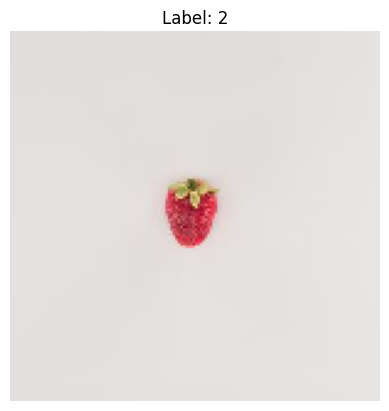

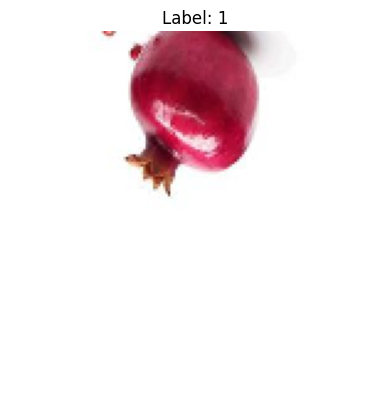

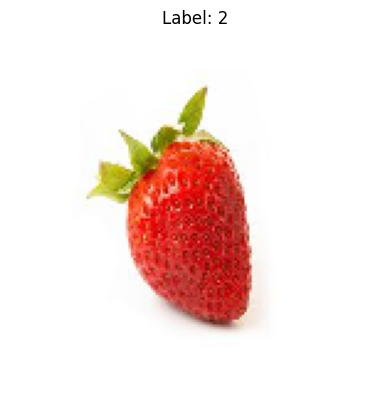

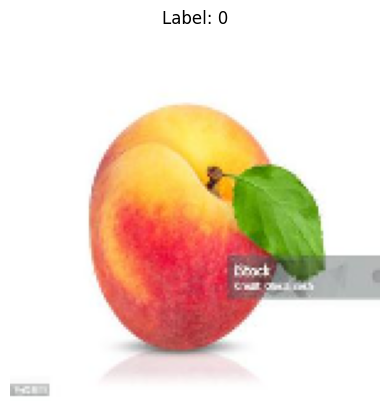

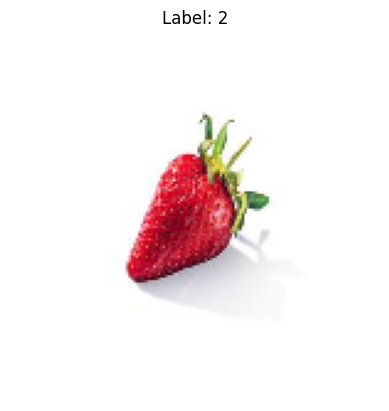

In [44]:
display_images(train_data)


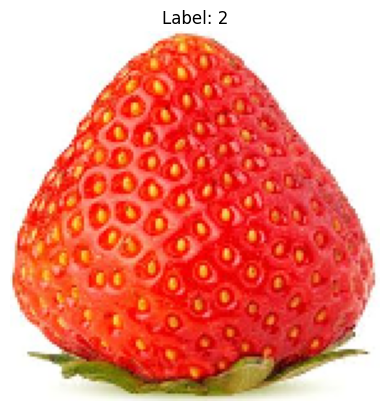

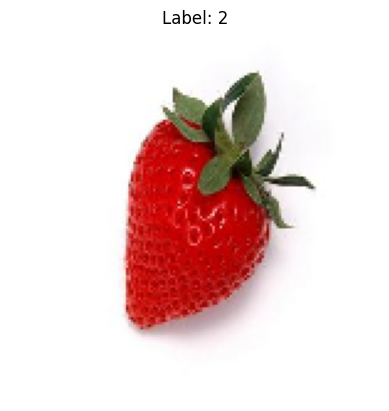

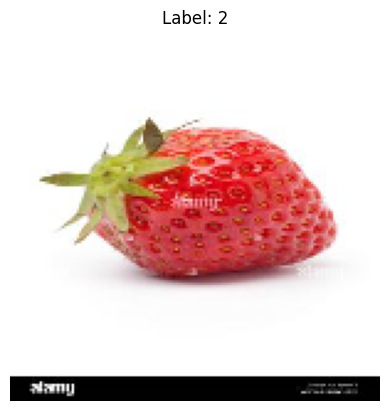

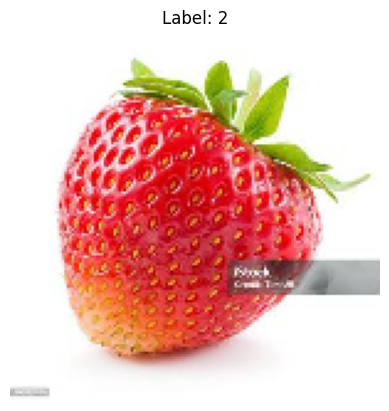

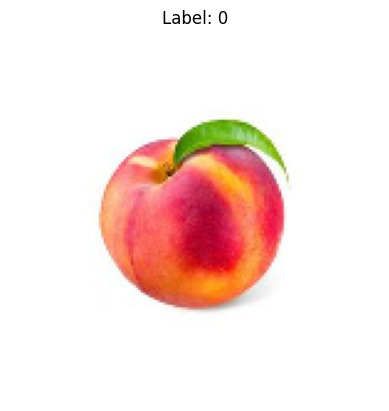

In [45]:
display_images(test_data)


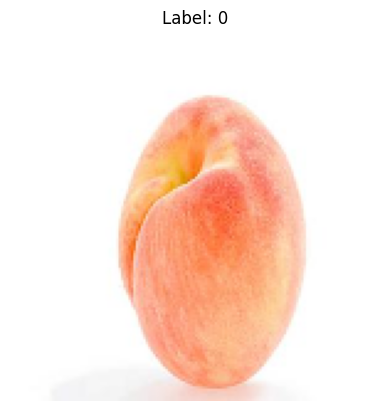

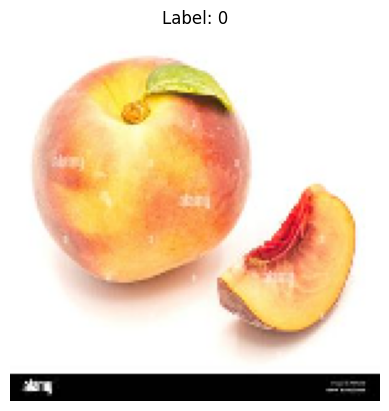

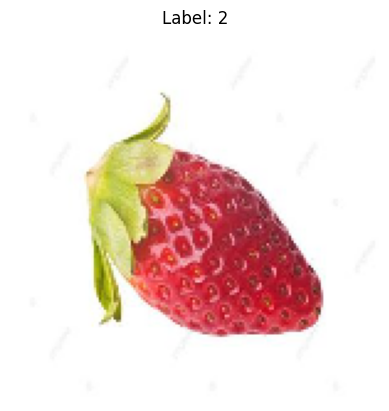

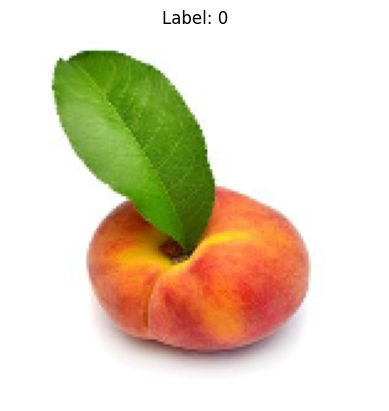

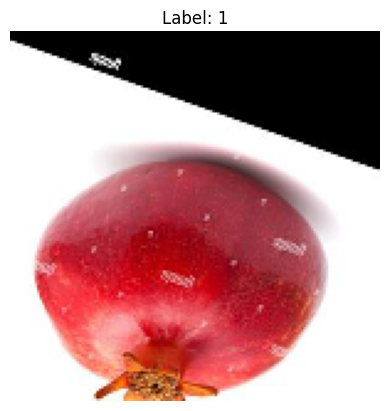

In [46]:
display_images(val_data)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the feature map to feed into dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(3, activation='softmax')  # 3 classes (cars, buses, bikes)
])


c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)

Epoch 1/15


c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.3684 - loss: 1.2840 - val_accuracy: 0.5467 - val_loss: 1.0364
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.4981 - loss: 1.0482 - val_accuracy: 0.5200 - val_loss: 0.9632
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.5837 - loss: 0.9033 - val_accuracy: 0.5867 - val_loss: 0.9300
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.6764 - loss: 0.7417 - val_accuracy: 0.6267 - val_loss: 0.8391
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.7537 - loss: 0.6206 - val_accuracy: 0.6800 - val_loss: 0.8138
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.7974 - loss: 0.5049 - val_accuracy: 0.8000 - val_loss: 0.5412
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.8216 - loss: 0.5972 - val_accuracy: 0.8267 - val_loss: 0.5614
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.8204 - loss: 0.4715 - val_accuracy: 0.7600 - val_loss: 0.5534
Epo

In [51]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7517 - loss: 0.5982
Test Accuracy: 0.77


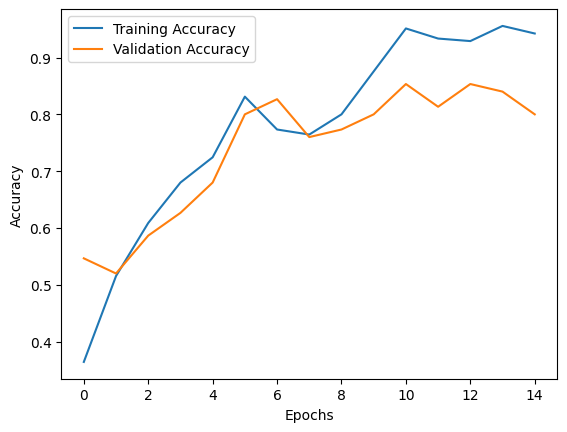

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [53]:
model.save("fruit_classification_model.h5")


In [57]:
from tensorflow.keras.utils import load_img, img_to_array

# Load and preprocess a new image
img = load_img("x.jpg", target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 150, 150, 3)

# Predict the class
predictions = model.predict(img_array)
class_indices = train_data.class_indices  # Map of class names
class_names = list(class_indices.keys())
print(f"Predicted Class: {class_names[predictions.argmax()]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: Peach
